This project focuses on the analysis of video game sales by the top consoles and publishers at the tail of 2016, Decemeber 2016 to be exact.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
sales = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [5]:
sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [53]:
sales['Year_of_Release'] = sales['Year_of_Release'].astype(int)

In [54]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 16 columns):
Name               16416 non-null object
Platform           16416 non-null object
Year_of_Release    16416 non-null int64
Genre              16416 non-null object
Publisher          16416 non-null object
NA_Sales           16416 non-null float64
EU_Sales           16416 non-null float64
JP_Sales           16416 non-null float64
Other_Sales        16416 non-null float64
Global_Sales       16416 non-null float64
Critic_Score       7982 non-null float64
Critic_Count       7982 non-null float64
User_Score         9837 non-null object
User_Count         7461 non-null float64
Developer          9904 non-null object
Rating             9767 non-null object
dtypes: float64(8), int64(1), object(7)
memory usage: 2.8+ MB


This dataset contains the information regarding the Video games, the platform, the year of release, the genre of the platform, the publisher of the video game, the sales in millions for the North American region- (this covers the United states and Canada), the EU region, the Japanese region and the rest of the regions around the world. The Sales information also tallies up for the overall global sales of each game from the year of release to 2016.
Other related information to the data includes the critic score, the critic count, user score, user count, Developer of the games and the ESRB ratings

### CLEANING THE DATA

In [9]:
sales['Name'].nunique() # There are 11,562 unique titles in the data

11562

In [11]:
sales.isna().any() # There are nulls in th name column, year of release column, genre, 
#publisher and user and critic columns

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool

In [13]:
sales['Name'].isna().sum() #There are just two null values in the name column so we are going to drop 
#these columns for the intial EDA

2

In [14]:
sales = sales[sales['Name'].notna()]

In [15]:
sales['Name'].isna().sum()

0

In [16]:
sales['Year_of_Release'].isna().sum()

269

In [17]:
sales['Publisher'].isna().sum()

54

For the initial analysis, I am going to drop the null values for the columns Year of Release and Publisher

In [19]:
sales = sales[sales['Year_of_Release'].notna()]
sales = sales[sales['Publisher'].notna()]

In [21]:
sales['Year_of_Release'].isna().sum()


0

In [22]:
sales['Publisher'].isna().sum()

0

In [25]:
sales['Publisher'].nunique() #There are 579 unique game publishers in the dataset

579

In [26]:
sales['Platform'].value_counts()

PS2     2127
DS      2122
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       952
XB       803
GBA      786
GC       542
3DS      512
PSV      429
PS4      393
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [28]:
sales['Genre'].value_counts()

Action          3307
Sports          2306
Misc            1697
Role-Playing    1483
Shooter         1296
Adventure       1291
Racing          1225
Platform         878
Simulation       855
Fighting         837
Strategy         672
Puzzle           569
Name: Genre, dtype: int64

In [29]:
sales['Genre'].isna().any()

False

### TOP TEN PUBLISHERS WITH THE MOST GAMES IN THE DATA

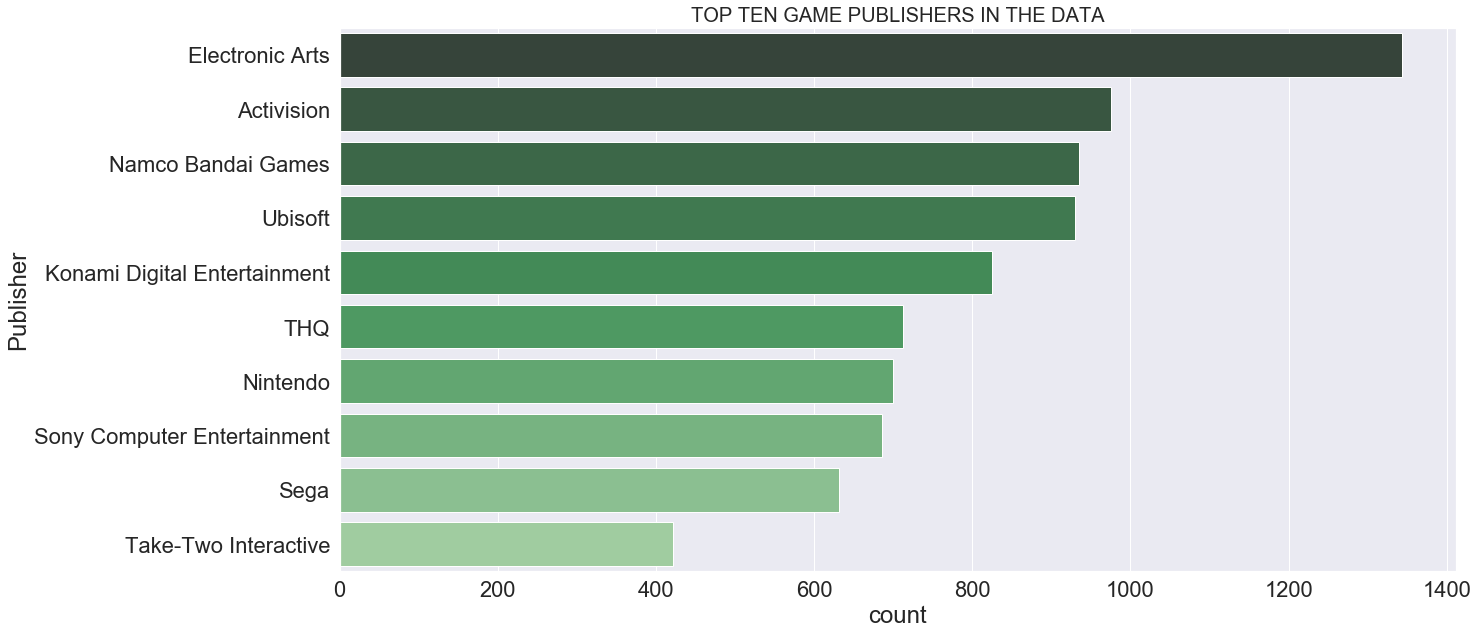

In [47]:
sns.set(font_scale=2) 
plt.figure(figsize = (20,10))
sns.countplot(y="Publisher", data=sales, palette="Greens_d",
              order=sales.Publisher.value_counts().iloc[:10].index)
plt.title('TOP TEN GAME PUBLISHERS IN THE DATA', fontsize = 20);

Clearly Electronic Arts has the most games in the data, second to Activision and in third we have Namco Bandai Games

#### TOP TEN PLATFORMS WITH THE MOST GAMES IN THE DATA

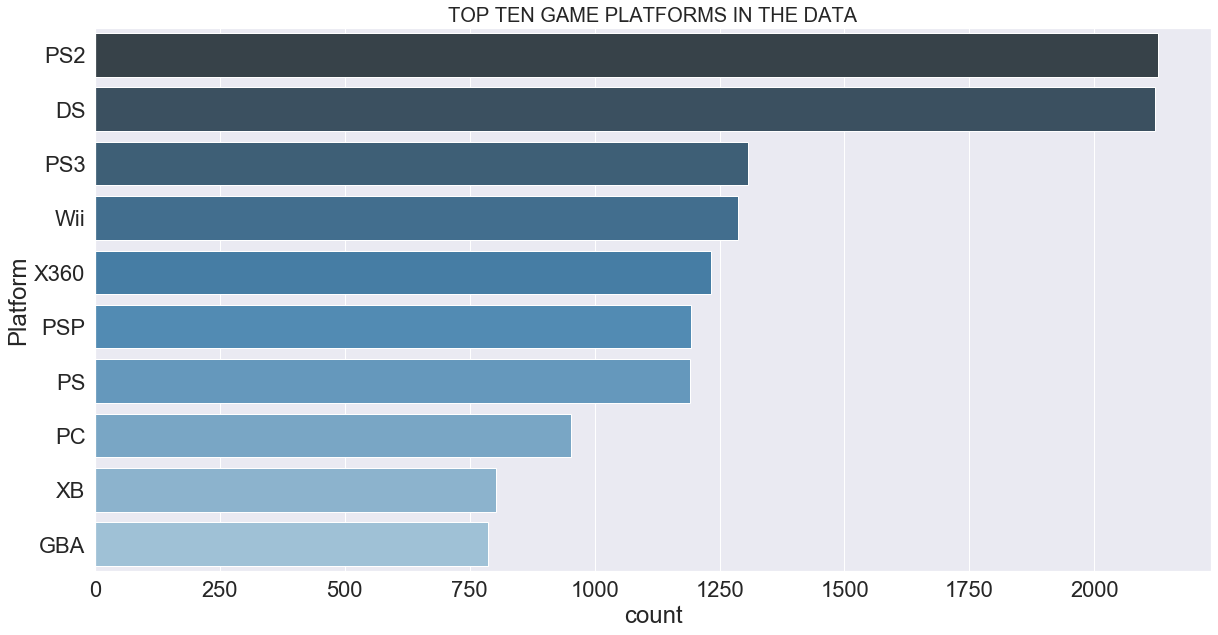

In [49]:
sns.set(font_scale=2) 
plt.figure(figsize = (20,10))
sns.countplot(y="Platform", data=sales, palette="Blues_d",
              order=sales.Platform.value_counts().iloc[:10].index)
plt.title('TOP TEN GAME PLATFORMS IN THE DATA', fontsize = 20);

The most popular gaming platforms in the data are PS2, NintendoDS and PS3 Games

#### TOP TEN YEARS FOR GAME RELEASE IN THE DATA

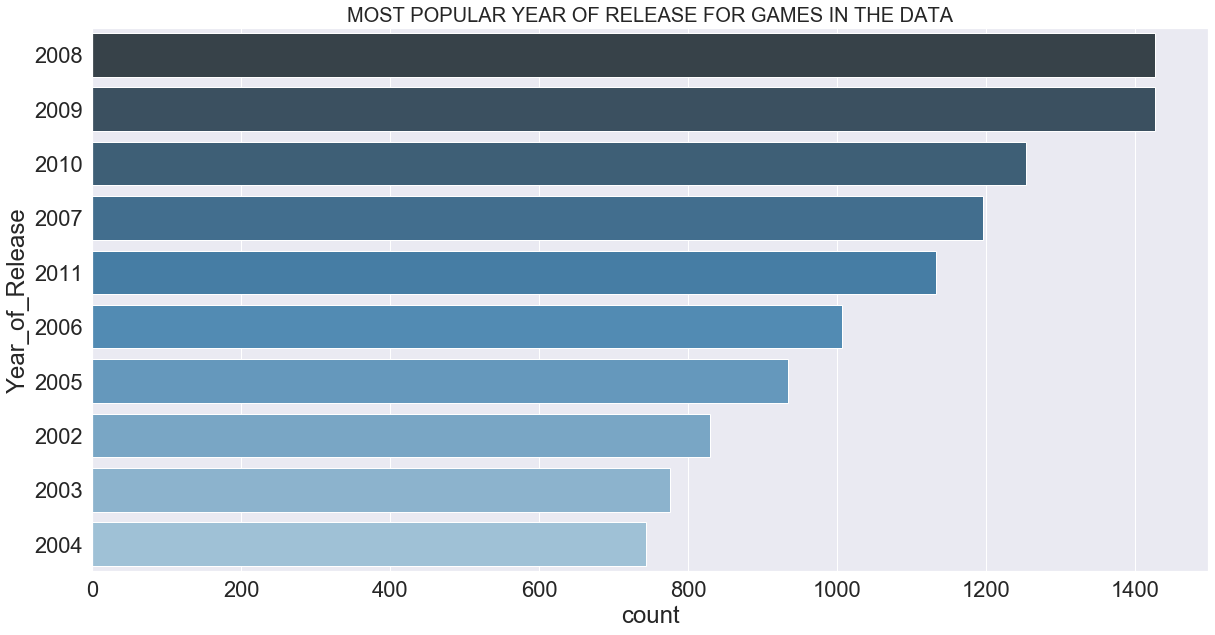

In [55]:
sns.set(font_scale=2) 
plt.figure(figsize = (20,10))
sns.countplot(y="Year_of_Release", data=sales, palette="Blues_d",
              order=sales.Year_of_Release.value_counts().iloc[:10].index)
plt.title('MOST POPULAR YEAR OF RELEASE FOR GAMES IN THE DATA', fontsize = 20);

The most popular year of release is 2008, followed by 2009 and 2010

The top 7th generation consoles in the data are Nintendo Wii, PS3 and XBOX360, the next point of call is to look at the global sales in millions for the 3 consoles

#### 7TH GENERATION CONSOLES GLOBAL SALES

In [62]:
seventh_gen = sales[(sales['Platform'] == 'Wii') | (sales['Platform'] == 'PS3') | (sales['Platform'] == 'X360')]
seventh_gen.shape

(3824, 16)

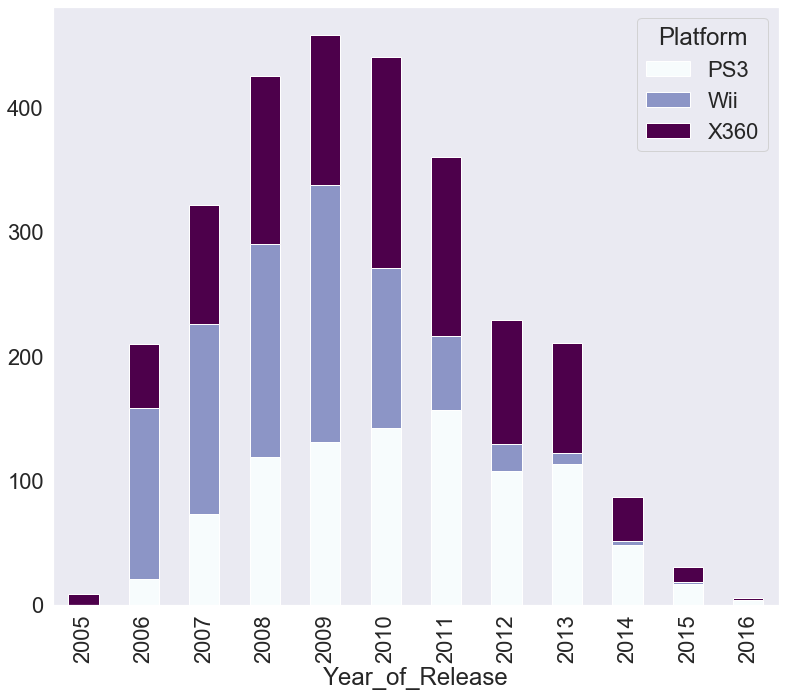

In [66]:

sns.set(font_scale=2) 
sales_year = seventh_gen.groupby(['Year_of_Release','Platform']).Global_Sales.sum()
sales_year.unstack().plot(kind='bar',stacked=True, colormap= 'BuPu',  
                           grid=False,  figsize=(13,11))

From the graph above, the XBOX 360 started sales in 2005, but with the advent of Nintendo Wii had the highest number of sales in 2006 and recorded its best year in 2009. The XBOX 360 recorded its best year in 2010 and the playstation 3 recorded its best year in 2011 and finished the seventh generation lifecycle strong after 2011, as sales began to dip for all three consoles.

Next we are going to look at the subsection of the top 3 markets for all top 3 consoles, the North American Market, European Market and the Japanese Market

#### 7TH GENERATION CONSOLES NORTH AMERICA SALES

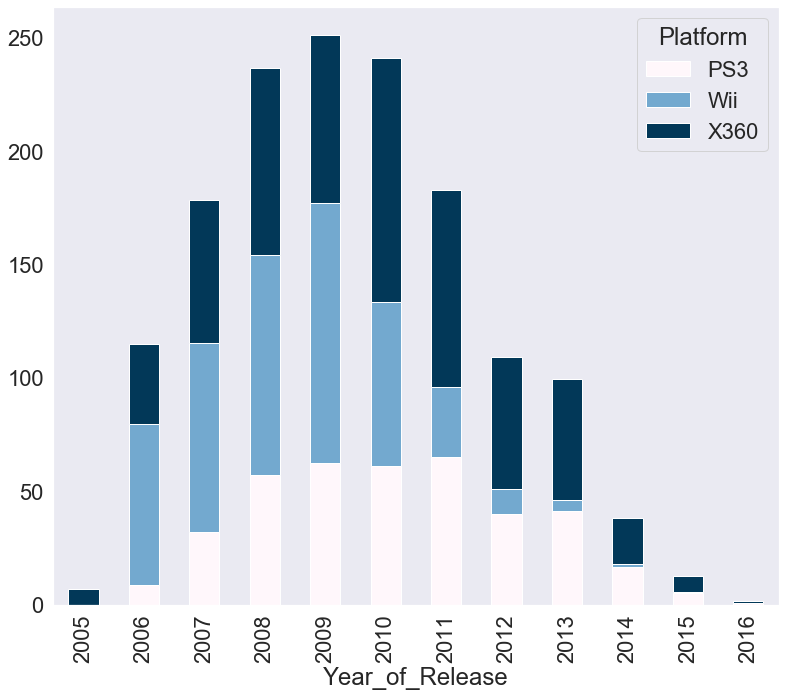

In [67]:
sns.set(font_scale=2) 
sales_year = seventh_gen.groupby(['Year_of_Release','Platform']).NA_Sales.sum()
sales_year.unstack().plot(kind='bar',stacked=True, colormap= 'PuBu',  
                           grid=False,  figsize=(13,11))

The graph above shows that the Nintendo Wii and the XBOX 360 were the high performing consoles in the Nofth American Market at the beginning of the 7th generation cycle, but the playstation 3 started to make sales improvement towards the end-cycle of the 7th generation.

#### 7TH GENERATION CONSOLES EUROPEAN SALES

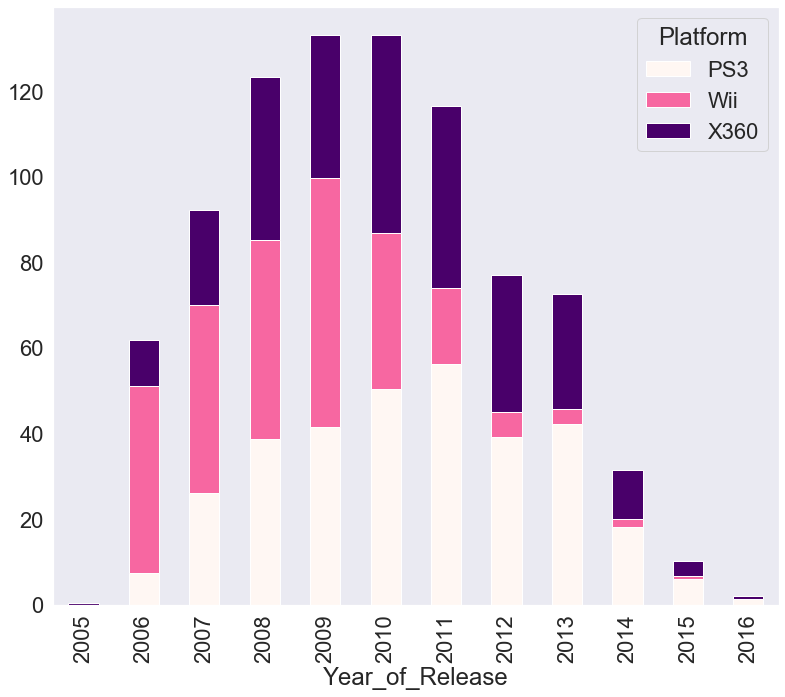

In [68]:
sns.set(font_scale=2) 
sales_year = seventh_gen.groupby(['Year_of_Release','Platform']).EU_Sales.sum()
sales_year.unstack().plot(kind='bar',stacked=True, colormap= 'RdPu',  
                           grid=False,  figsize=(13,11))

The EU sales follows nearly the same trend the global sales did, with the Nintendo Wii performing excellently well in the beginning of the 7Th generation cycle but tailed off towards the end. The playstation 3 went from strength to strength over the years of the 7th generation cycle, finishing strong relative to the 3 consoles between 2013-2016

#### 7TH GENERATION CONSOLES JAPANESE SALES

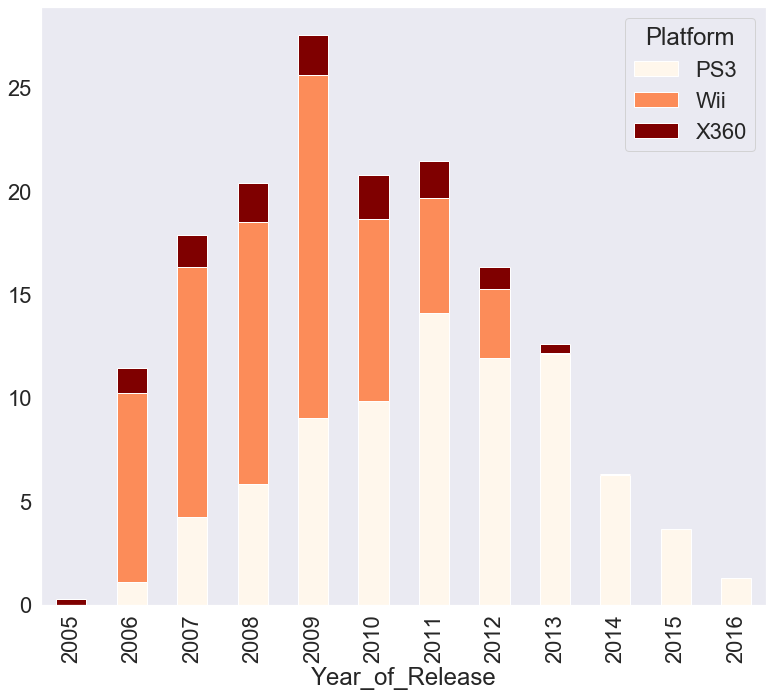

In [69]:
sns.set(font_scale=2) 
sales_year = seventh_gen.groupby(['Year_of_Release','Platform']).JP_Sales.sum()
sales_year.unstack().plot(kind='bar',stacked=True, colormap= 'OrRd',  
                           grid=False,  figsize=(13,11))

As exepected PS3 and Nintendo Wii outperformed the X360 in the Japansese market. After 2013, PS3 was the only console dominating the Japanese market. Nintendo Wii had the highest game sales in 2009 whilst PS3 has peak sales came in 2011.

#### TOP TEN  BEST SELLING GAMES FOR DURING 7TH GENERATION

In [127]:
games_sales = seventh_gen.groupby(['Name','Platform', 'Global_Sales']).Global_Sales.sum()
sorted_games  = games_sales.sort_values().tail(10)

Text(0.5, 1.0, 'Top ten best selling games during the 7th generation')

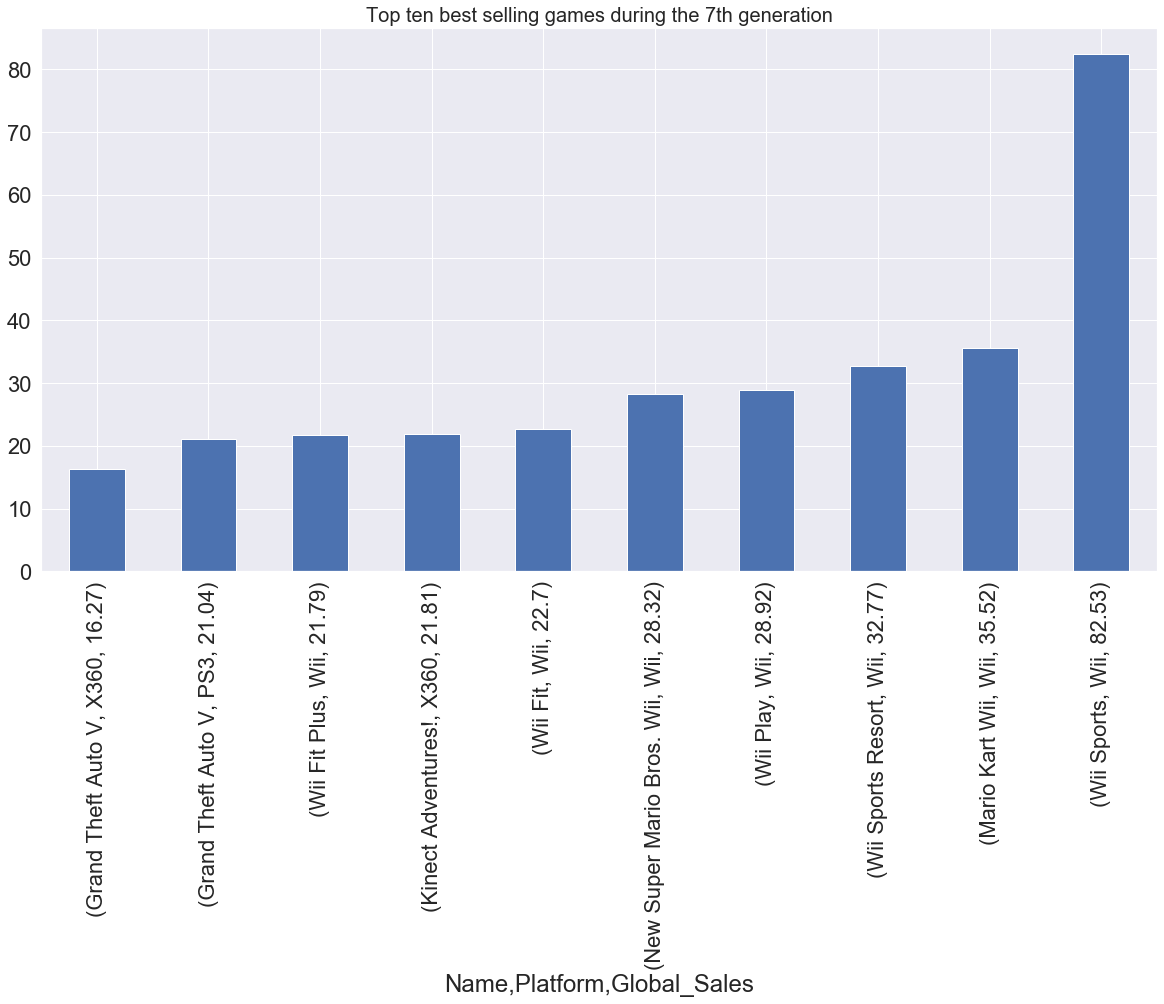

In [128]:
plt.figure(figsize = (20,10))
sorted_games.plot(kind='bar', x='Name')
plt.title("Top ten best selling games during the 7th generation", fontsize = 20)

From the plot above the top three best selling games during the Wii Sports, Mario Kart Wii and Wii sports Resort on the Nintendo Wii

#### MICROSOFT XBOX 360 AND PLAYSTATION 3 TOP SELLING GAMES DURING 7TH GENERATION CONSOLE

In [117]:
psxbox_gen = sales[(sales['Platform'] == 'PS3') | (sales['Platform'] == 'X360')]

In [120]:
psxbox_sales = psxbox_gen.groupby(['Name','Platform', 'Global_Sales']).Global_Sales.sum()
sorted_psxbox  = psxbox_sales.sort_values().tail(10)

In [121]:
sorted_psxbox

Name                            Platform  Global_Sales
Call of Duty: Black Ops         PS3       12.63           12.63
Call of Duty: Modern Warfare 3  PS3       13.32           13.32
Call of Duty: Modern Warfare 2  X360      13.47           13.47
Call of Duty: Black Ops II      X360      13.67           13.67
                                PS3       13.79           13.79
Call of Duty: Black Ops         X360      14.61           14.61
Call of Duty: Modern Warfare 3  X360      14.73           14.73
Grand Theft Auto V              X360      16.27           16.27
                                PS3       21.04           21.04
Kinect Adventures!              X360      21.81           21.81
Name: Global_Sales, dtype: float64

Text(0.5, 1.0, 'Top ten best selling games for PS3 and Xbox 360 during the 7th generation')

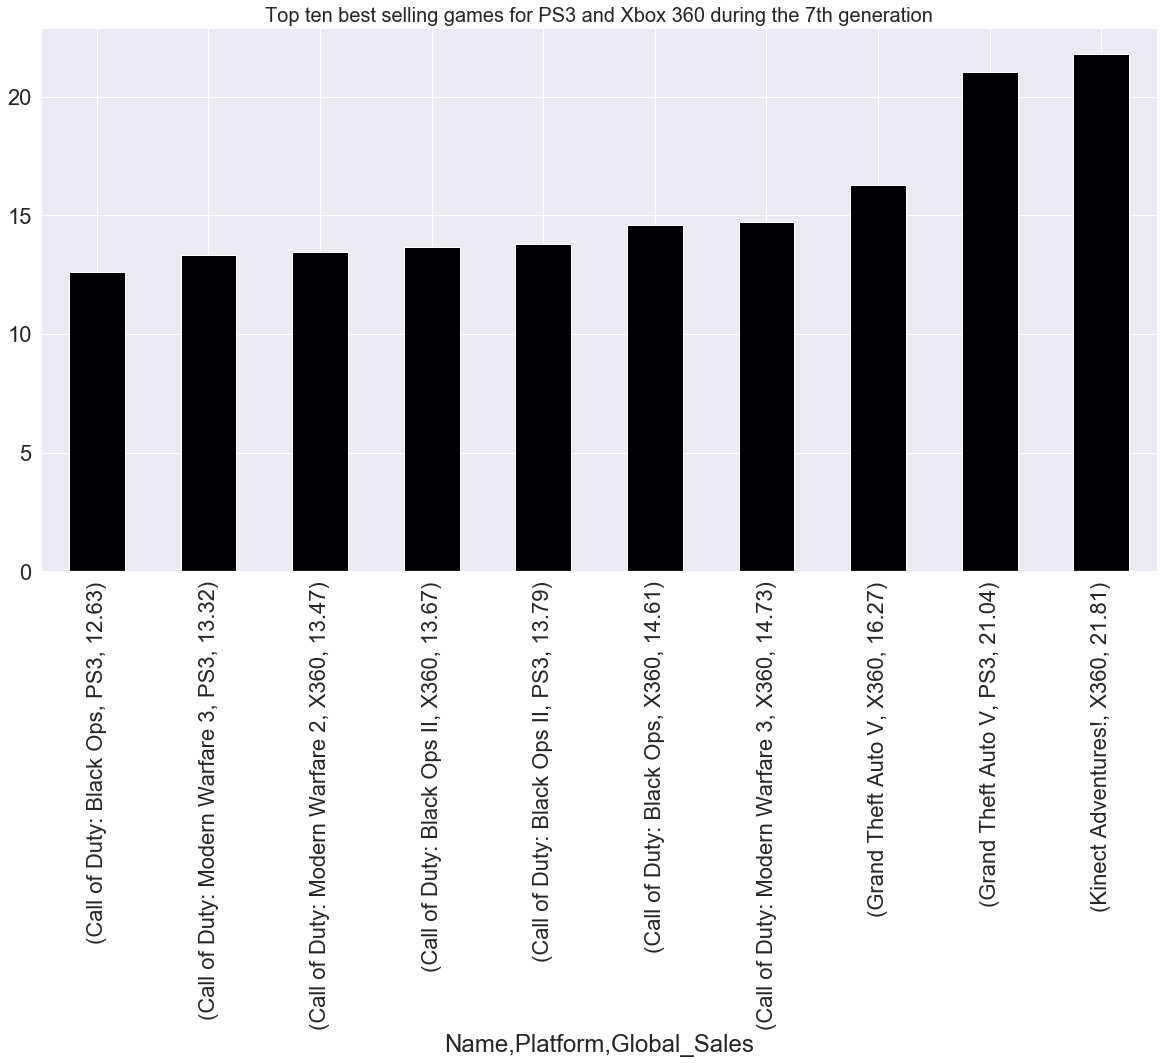

In [124]:
plt.figure(figsize = (20,10))
sorted_psxbox.plot(kind='bar', x='Name', cmap = 'magma')
plt.title("Top ten best selling games for PS3 and Xbox 360 during the 7th generation", fontsize = 20)

The top three best selling games on both consoles are Grand Theft Auto V, Call of Duty : Modern Warfare 3, Call of Duty: Black Ops. Take note that the best AAA title of the 7th generation Grand Theft Auto V had more sales on Playstation Platform than the XBOX platform